In [28]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
img=cv2.imread("C:\\Users\\Sai Deepak Reddy\\Desktop\\Projects\\Celebrity Faces Dataset\\Angelina Jolie\\001_fe3347c0.jpg")
img.shape

(569, 474, 3)

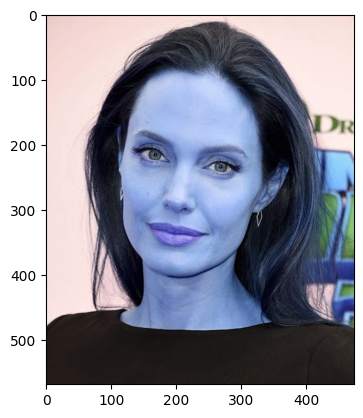

In [30]:
plt.imshow(img)

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(569, 474)

In [32]:
gray

array([[216, 213, 211, ..., 229, 232, 232],
       [213, 211, 208, ..., 226, 233, 233],
       [211, 208, 206, ..., 223, 228, 228],
       ...,
       [ 41,  31,  27, ...,  31,  23,  32],
       [ 63,  42,  26, ...,  34,  33,  54],
       [ 68,  30,  32, ...,  29,  32,  67]], dtype=uint8)

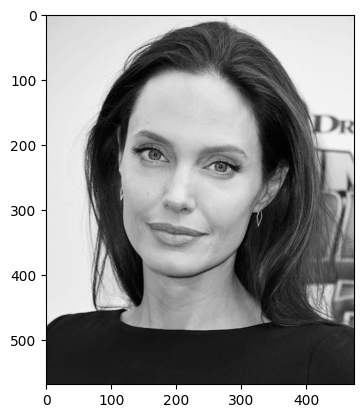

In [33]:
plt.imshow(gray, cmap='gray')

In [34]:
face_cascade = cv2.CascadeClassifier("C:\\Users\\Sai Deepak Reddy\\Desktop\\Projects\\haarcascades_opencv\\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:\\Users\\Sai Deepak Reddy\\Desktop\\Projects\\haarcascades_opencv\\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 71, 112, 290, 290]], dtype=int32)

In [35]:
x,y,w,h = faces[0]
x,y,w,h

(np.int32(71), np.int32(112), np.int32(290), np.int32(290))

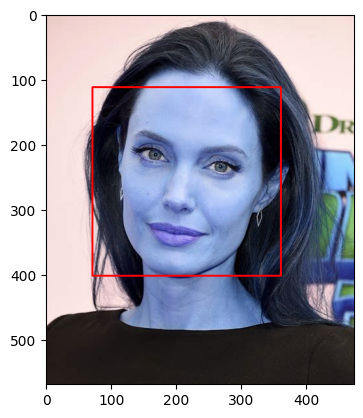

In [36]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

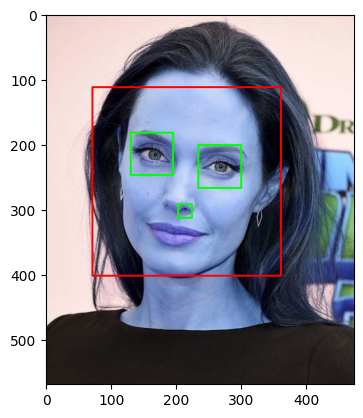

In [37]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

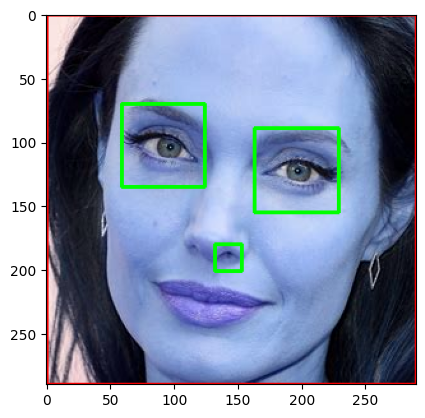

In [38]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [39]:
cropped_img = np.array(roi_color)
cropped_img.shape

(290, 290, 3)

In [40]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

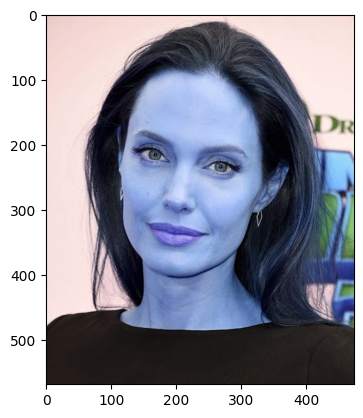

In [41]:
org_img=cv2.imread("C:\\Users\\Sai Deepak Reddy\\Desktop\\Projects\\Celebrity Faces Dataset\\Angelina Jolie\\001_fe3347c0.jpg")
plt.imshow(org_img)

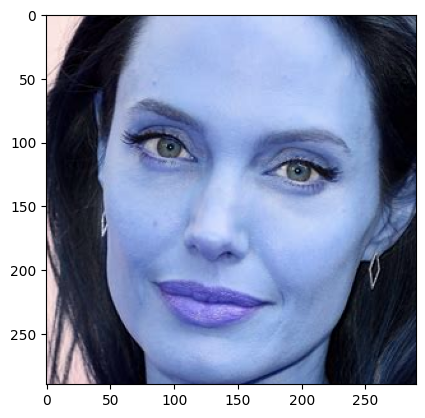

In [42]:
cropped_image = get_cropped_image_if_2_eyes("C:\\Users\\Sai Deepak Reddy\\Desktop\\Projects\\Celebrity Faces Dataset\\Angelina Jolie\\001_fe3347c0.jpg")
plt.imshow(cropped_image)

In [43]:
path_to_data = "./Celebrity Faces Dataset/"
path_to_cr_data = "./cropped/"

In [44]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [45]:
img_dirs

['./Celebrity Faces Dataset/Angelina Jolie',
 './Celebrity Faces Dataset/Brad Pitt',
 './Celebrity Faces Dataset/Denzel Washington',
 './Celebrity Faces Dataset/Hugh Jackman',
 './Celebrity Faces Dataset/Jennifer Lawrence',
 './Celebrity Faces Dataset/Johnny Depp',
 './Celebrity Faces Dataset/Kate Winslet',
 './Celebrity Faces Dataset/Leonardo DiCaprio',
 './Celebrity Faces Dataset/Megan Fox',
 './Celebrity Faces Dataset/Natalie Portman',
 './Celebrity Faces Dataset/Nicole Kidman',
 './Celebrity Faces Dataset/Robert Downey Jr',
 './Celebrity Faces Dataset/Sandra Bullock',
 './Celebrity Faces Dataset/Scarlett Johansson',
 './Celebrity Faces Dataset/Tom Cruise',
 './Celebrity Faces Dataset/Tom Hanks',
 './Celebrity Faces Dataset/Will Smith']

In [46]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [47]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

Angelina Jolie
Generating cropped images in folder:  ./cropped/Angelina Jolie
Brad Pitt
Generating cropped images in folder:  ./cropped/Brad Pitt
Denzel Washington
Generating cropped images in folder:  ./cropped/Denzel Washington
Hugh Jackman
Generating cropped images in folder:  ./cropped/Hugh Jackman
Jennifer Lawrence
Generating cropped images in folder:  ./cropped/Jennifer Lawrence
Johnny Depp
Generating cropped images in folder:  ./cropped/Johnny Depp
Kate Winslet
Generating cropped images in folder:  ./cropped/Kate Winslet
Leonardo DiCaprio
Generating cropped images in folder:  ./cropped/Leonardo DiCaprio
Megan Fox
Generating cropped images in folder:  ./cropped/Megan Fox
Natalie Portman
Generating cropped images in folder:  ./cropped/Natalie Portman
Nicole Kidman
Generating cropped images in folder:  ./cropped/Nicole Kidman
Robert Downey Jr
Generating cropped images in folder:  ./cropped/Robert Downey Jr
Sandra Bullock
Generating cropped images in folder:  ./cropped/Sandra Bulloc

In [48]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Angelina Jolie': ['./cropped/Angelina Jolie\\Angelina Jolie1.png',
  './cropped/Angelina Jolie\\Angelina Jolie10.png',
  './cropped/Angelina Jolie\\Angelina Jolie11.png',
  './cropped/Angelina Jolie\\Angelina Jolie12.png',
  './cropped/Angelina Jolie\\Angelina Jolie13.png',
  './cropped/Angelina Jolie\\Angelina Jolie14.png',
  './cropped/Angelina Jolie\\Angelina Jolie15.png',
  './cropped/Angelina Jolie\\Angelina Jolie16.png',
  './cropped/Angelina Jolie\\Angelina Jolie17.png',
  './cropped/Angelina Jolie\\Angelina Jolie18.png',
  './cropped/Angelina Jolie\\Angelina Jolie19.png',
  './cropped/Angelina Jolie\\Angelina Jolie2.png',
  './cropped/Angelina Jolie\\Angelina Jolie20.png',
  './cropped/Angelina Jolie\\Angelina Jolie21.png',
  './cropped/Angelina Jolie\\Angelina Jolie22.png',
  './cropped/Angelina Jolie\\Angelina Jolie23.png',
  './cropped/Angelina Jolie\\Angelina Jolie24.png',
  './cropped/Angelina Jolie\\Angelina Jolie25.png',
  './cropped/Angelina Jolie\\Angelina Jolie26.pn

In [49]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

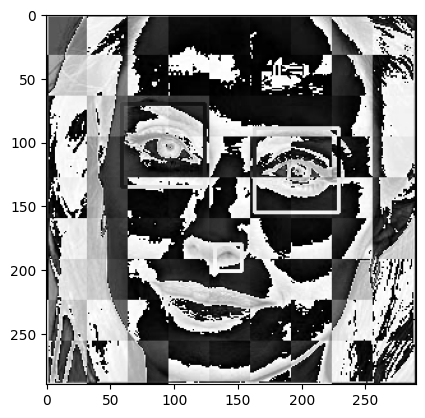

In [50]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [51]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Angelina Jolie': 0,
 'Brad Pitt': 1,
 'Denzel Washington': 2,
 'Hugh Jackman': 3,
 'Jennifer Lawrence': 4,
 'Johnny Depp': 5,
 'Kate Winslet': 6,
 'Leonardo DiCaprio': 7,
 'Megan Fox': 8,
 'Natalie Portman': 9,
 'Nicole Kidman': 10,
 'Robert Downey Jr': 11,
 'Sandra Bullock': 12,
 'Scarlett Johansson': 13,
 'Tom Cruise': 14,
 'Tom Hanks': 15,
 'Will Smith': 16}

In [52]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [53]:
len(X[0])

4096

In [54]:
32*32*3 + 32*32

4096

In [55]:
X[0]

array([[249],
       [228],
       [226],
       ...,
       [  3],
       [243],
       [227]], dtype=uint8)

In [56]:
y[0]

0

In [57]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1376, 4096)

**Data cleaning process is done. Now we are ready to train our model**

We will use SVM with rbf kernel tuned with heuristic finetuning

In [58]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5813953488372093

In [60]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.54      0.45      0.49        31
           1       0.50      0.64      0.56        11
           2       0.42      0.85      0.56        13
           3       0.53      0.50      0.51        18
           4       0.44      0.55      0.49        22
           5       0.55      0.35      0.43        17
           6       0.73      0.62      0.67        26
           7       0.77      0.63      0.69        27
           8       0.41      0.54      0.47        13
           9       0.47      0.44      0.46        18
          10       0.83      0.65      0.73        23
          11       0.43      0.40      0.41        15
          12       0.50      0.56      0.53        16
          13       0.61      0.95      0.74        38
          14       0.83      0.56      0.67        18
          15       0.92      0.61      0.73        18
          16       0.50      0.30      0.38        20

    accuracy              

Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [61]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [62]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [63]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\Sai Deepak Reddy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Sai Deepak Reddy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Sai Deepak Reddy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Sai Dee

,model,best_score,best_params
0,svm,0.631743,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.307120,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.619206,{'logisticregression__C': 1}


In [64]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [65]:
best_estimators['svm'].score(X_test,y_test)

0.6453488372093024

In [66]:
best_estimators['random_forest'].score(X_test,y_test)

0.311046511627907

In [67]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5959302325581395

In [68]:
best_clf = best_estimators['svm']

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[15,  0,  0,  0,  1,  1,  0,  0,  6,  5,  0,  0,  1,  2,  0,  0,
         0],
       [ 0,  7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  1,  0,
         0],
       [ 0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0],
       [ 1,  1,  0, 12,  0,  0,  0,  2,  0,  0,  1,  0,  0,  1,  0,  0,
         0],
       [ 0,  0,  0,  1, 12,  0,  4,  0,  0,  0,  1,  1,  0,  2,  1,  0,
         0],
       [ 1,  1,  2,  1,  0,  7,  0,  0,  2,  0,  1,  1,  0,  0,  0,  0,
         1],
       [ 1,  0,  0,  0,  2,  0, 19,  0,  0,  0,  2,  0,  0,  2,  0,  0,
         0],
       [ 2,  1,  1,  2,  0,  1,  1, 18,  0,  0,  1,  0,  0,  0,  0,  0,
         0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  8,  1,  0,  0,  1,  0,  0,  0,
         0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  1,  9,  0,  2,  1,  3,  1,  0,
         0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  2, 12,  0,  0,  4,  0,  0,
         0],
       [ 0,  3,  1,  1,  0,  2,  0,  0,  0,  0,  0,  8,  0,  0,  

Text(95.72222222222221, 0.5, 'Truth')

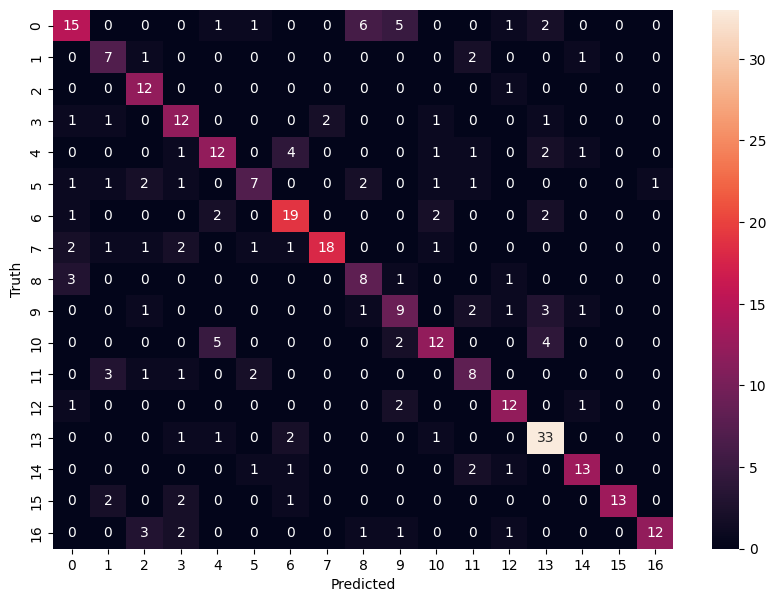

In [70]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
class_dict

{'Angelina Jolie': 0,
 'Brad Pitt': 1,
 'Denzel Washington': 2,
 'Hugh Jackman': 3,
 'Jennifer Lawrence': 4,
 'Johnny Depp': 5,
 'Kate Winslet': 6,
 'Leonardo DiCaprio': 7,
 'Megan Fox': 8,
 'Natalie Portman': 9,
 'Nicole Kidman': 10,
 'Robert Downey Jr': 11,
 'Sandra Bullock': 12,
 'Scarlett Johansson': 13,
 'Tom Cruise': 14,
 'Tom Hanks': 15,
 'Will Smith': 16}

**Save the trained model**

In [72]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

**Save class dictionary**

In [73]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))